In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import re
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MelikeAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MelikeAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
data = pd.read_csv("IMDB Dataset.csv")

In [82]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [83]:
data.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [84]:
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

In [85]:
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [86]:
def gen_freq(text):
    #will store all the words in list
    words_list = []
    
    #Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)
        
    #Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()
    
    #print top 100 words
    word_freq[:100]
    
    return word_freq   

In [87]:
freq = gen_freq(data.review.str)
freq

the                568735
a                  306960
and                301919
of                 283625
to                 261850
                    ...  
"Mithi/Mithali"         1
(Konkona)               1
"Prof.Anu"              1
(Shabhana               1
Yosemite.<br            1
Name: count, Length: 438729, dtype: int64

In [88]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


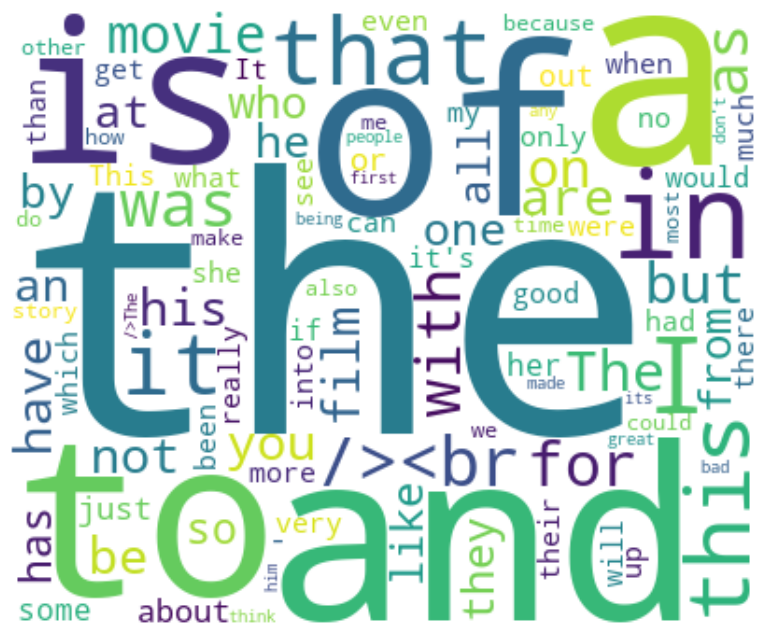

In [89]:
#Import library WordCloud
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(freq)

plt.figure(figsize=(14,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

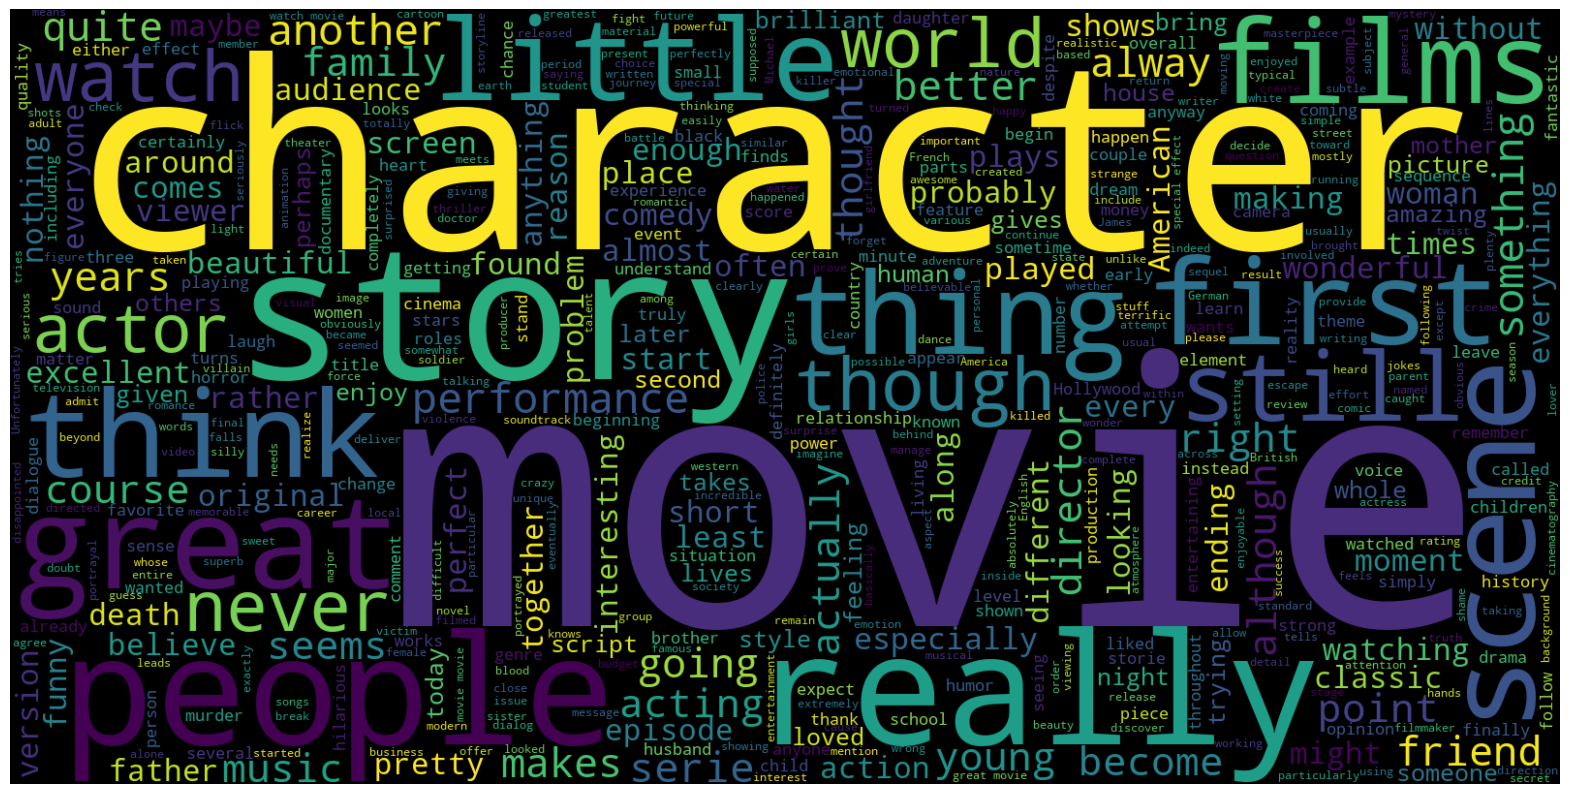

In [90]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

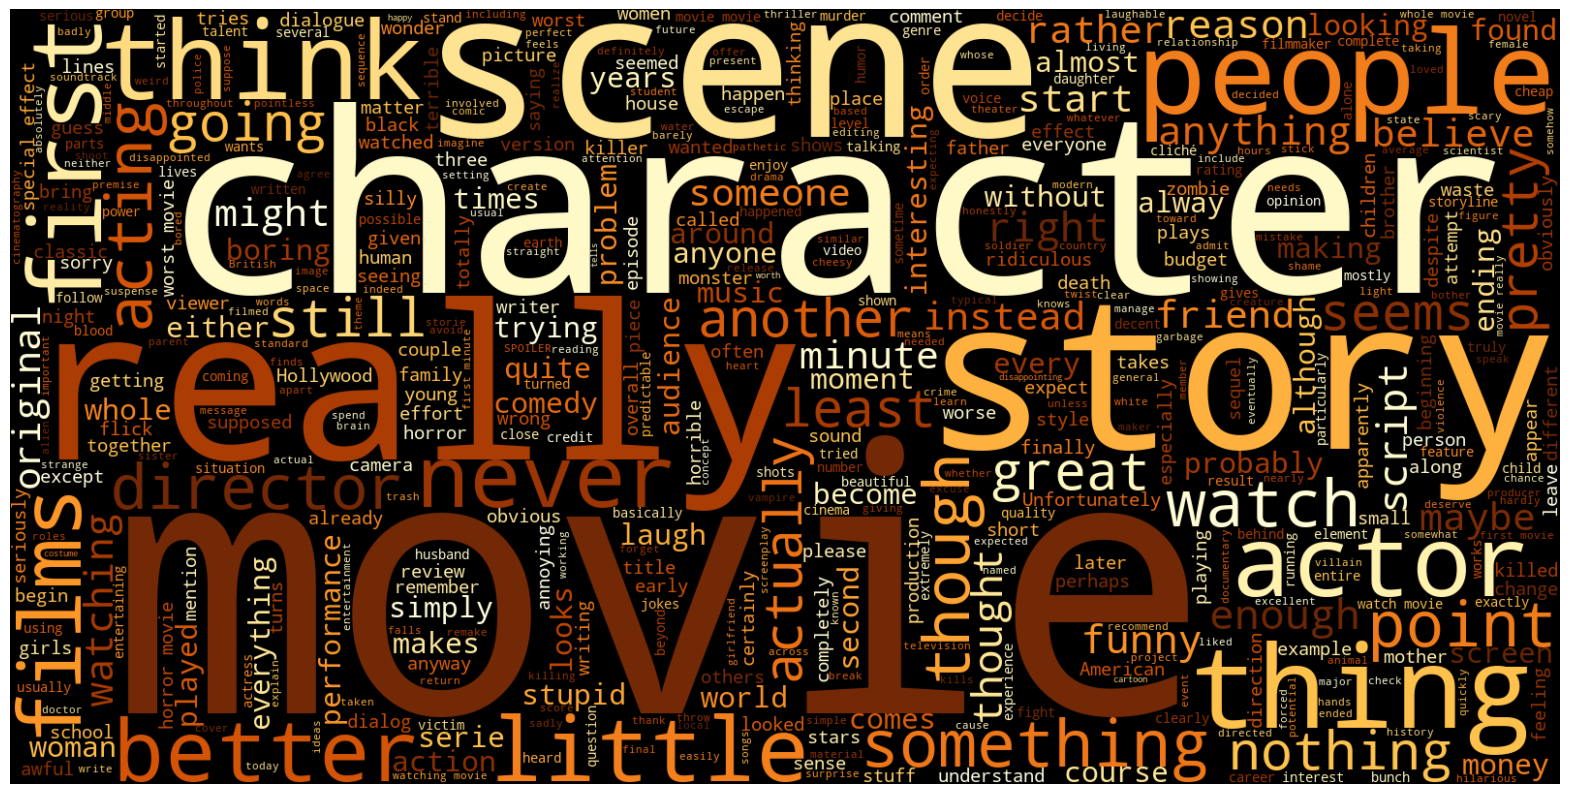

In [91]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')
#cloud for negative

In [92]:
#removing stopwords
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')

In [93]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

In [94]:
tokenizer=ToktokTokenizer()

In [95]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_word_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_word_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']= data['review'].apply(remove_stopwords)

In [96]:
#Text Cleaning
#process of clearing punctuation marks in data
##cleaning unnecessary marks in data. </p> </li>
#capitalization to lowercase. </p> </li>
#cleaning extra spaces. </p> </li>
#removal of stopwords in sentences. </p> </li>
import re
#clearing punctuation & unnecessary marks
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#capitalization to lowercase
data['review'] = data['review'].apply(lambda x: x.lower())

#cleaning extra spaces
data['review'] = data['review'].apply(lambda x: x.strip())

In [97]:
#Removing html strips and noise text
from bs4 import BeautifulSoup

In [98]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    return text

#Apply function on review column
    text = strip_html(text)
    text = remove_between_square_brackets(text)
data['review']=data['review'].apply(denoise_text)

In [99]:
data_copy = data.copy()

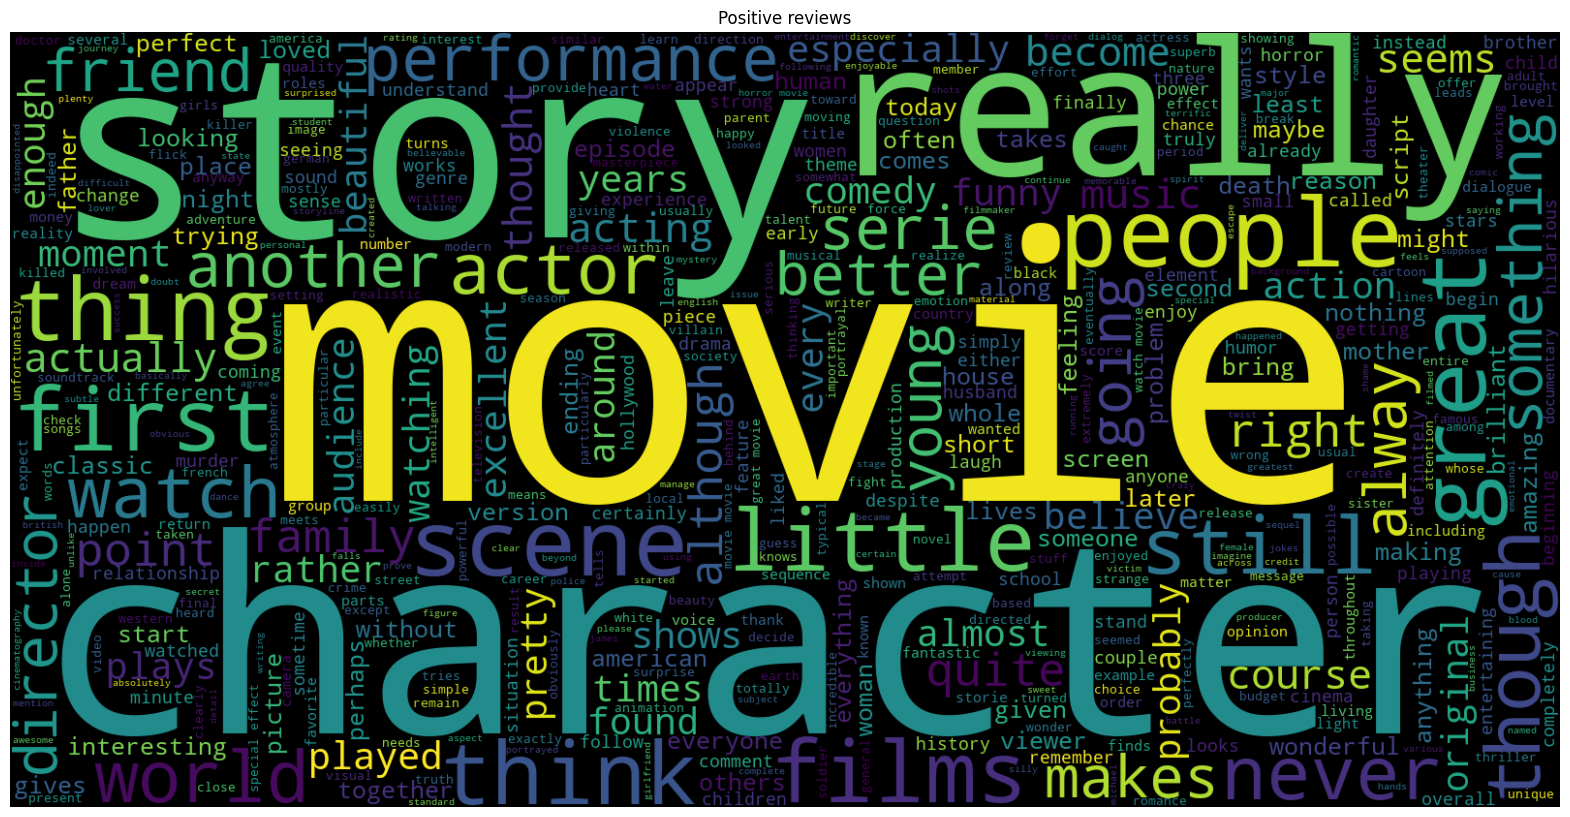

In [100]:
#wordcloud after clening
# POSITIVE REVIEWS
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

plt.axis("off")
plt.title('Positive reviews')
plt.imshow(Wc , interpolation = 'bilinear')

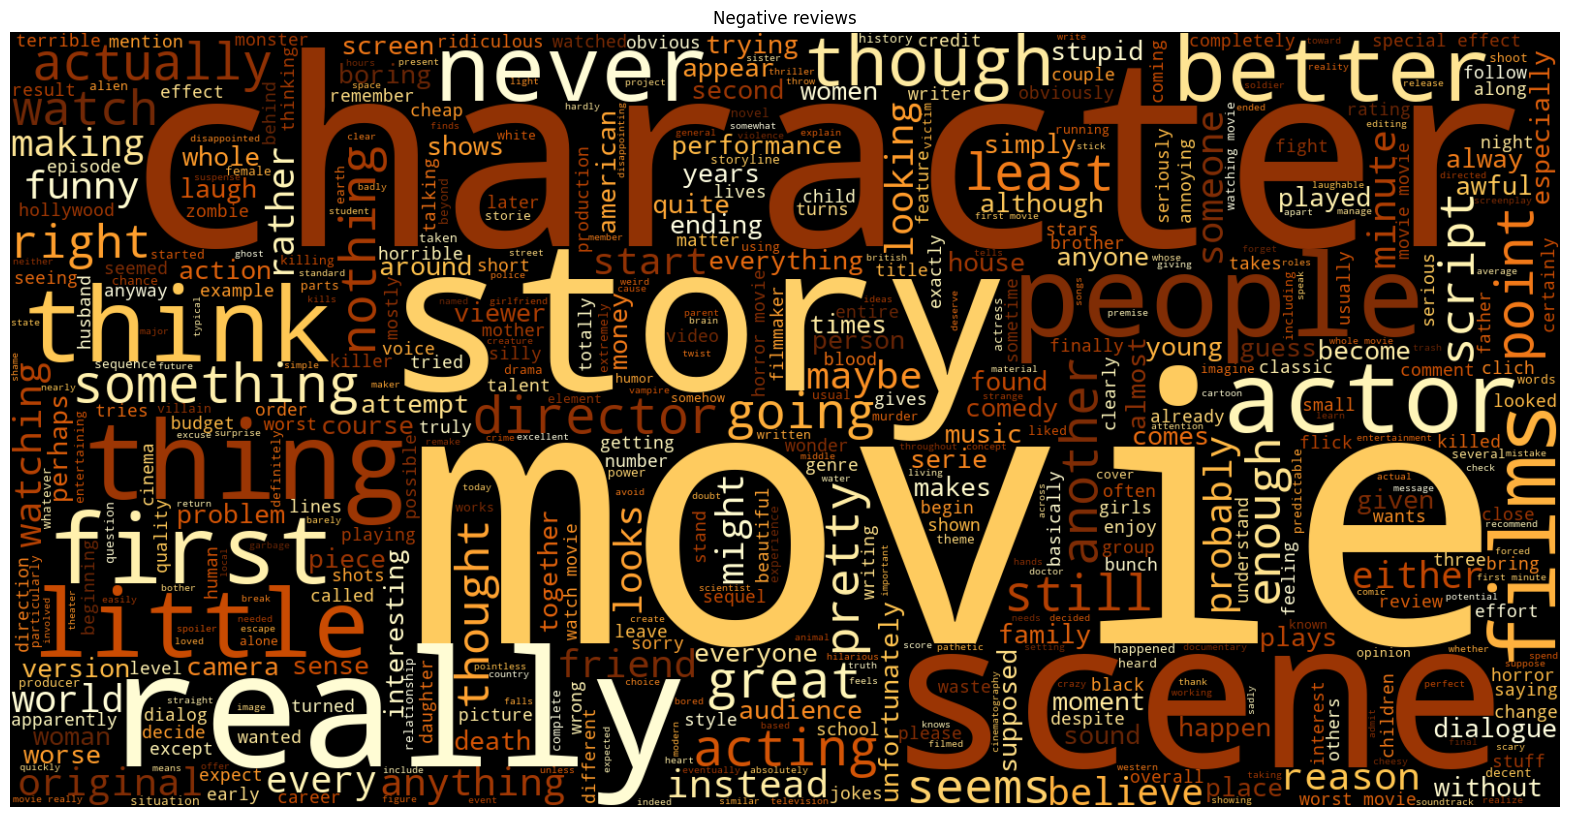

In [101]:
# Negative Reviews
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))

plt.axis("off")
plt.title('Negative reviews')
plt.imshow(Wc , interpolation = 'bilinear')

In [102]:
sentiment = data['sentiment'].values
sentiment

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [103]:
data = data['review']

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

In [105]:
#We create a dictionary of 15000 most used words in English for later use.

tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(data)
#tokenizer.word_index

In [106]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [107]:
#Then we take the word count of each of our sentences in our data and create a list.
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [108]:
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

292

In [109]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [110]:
#max_tokens : This value will allow us to reduce the distribution of sentences in our data and the sentences with opposite lengths, if any, to the average.
#It is checked what percentage of the data this determined number covers.
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.94542

In [111]:
#data is adjusted according to the number of tokens specified
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [112]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [113]:
print(return_to_sentence(x_train_pad[9]))

thesis behind rise evil seems br br hitler bad man bad man hated jews case miss going fact every scene film br br there effort whatsoever try explain mood time hitler may adopted views strategy did needless say unlike generally excellent nazis warning history film neglected point fact nearly leaders munich communist rising jewish may views subject linking jews absolutely crucial aspect understanding much nazi era br br but much understanding done film makers going go got stuff knew anyway certainly get fascinating fact hitler briefly socialist communist immediately ww would course far complex film handle might even detract relentless bad away incessantly br br we know bad man however also know figure public speaker private situations could polite even sympathetic course views like anti alcohol anti smoking many guardian readers could agree with also famously fond animals hence wholly invented dog scene absurd br br he also accounts seen brave soldier ww whilst saw iron cross never get 

In [114]:
#token equivalent of comment
print(x_train_pad[9])

[13038   403  2074   352    88     1     1  2064    15    46    15    46
  1695  4385   303   586    73    96    76    49     3     1     1   272
   671  1516   244  1146  1136     7  2064   100  5224  2694 10670  1296
  3034    51   923  1187   210  3462  1635   369     3  6946   119    96
   692  6040 12721  4158  4186  2302   100  2694   685 14522  4385   306
  4159  1183  1656    14  2418   883     1     1   554    14  1656   120
     3  1115    73    54    93   406   569   441   310    16  1323    96
  2064  3101 11031  4158  1111  4883     9   158   123  1190     3  2718
   130     8  6436  6547    15   138 14934     1     1  2200    43    15
    46    95    19    43   729   937  9834  1855  1031    25  9357     8
  2091   158  2694     5   975  4630   975  3056    34  7503  6075    25
   913   880    19 14028  4149  1474  2818  5298  5109   675    49  1762
     1     1  2290    19  5945    35  2681  1424  4883  1710   111  3887
  1506    37    16    12  1292  9531   126  3034   

In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import re
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MelikeAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MelikeAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [116]:
# LSTM

In [117]:
model_lstm = Sequential()

embedding_size = 50

model_lstm.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model_lstm.add(LSTM(units=16, return_sequences=True))
model_lstm.add(Dropout(0.1))

model_lstm.add(LSTM(units=8, return_sequences=True))
model_lstm.add(Dropout(0.1))

model_lstm.add(LSTM(units=4))
model_lstm.add(Dropout(0.1))

model_lstm.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)

model_lstm.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [118]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = model_lstm.fit(x_train_pad, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 717ms/step - accuracy: 0.5879 - loss: 0.6885 - val_accuracy: 0.7683 - val_loss: 0.6460
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - accuracy: 0.8072 - loss: 0.6044 - val_accuracy: 0.8276 - val_loss: 0.5392
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 632ms/step - accuracy: 0.8625 - loss: 0.5075 - val_accuracy: 0.8558 - val_loss: 0.4750
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 650ms/step - accuracy: 0.8962 - loss: 0.4347 - val_accuracy: 0.8608 - val_loss: 0.4342
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 639ms/step - accuracy: 0.9153 - loss: 0.3778 - val_accuracy: 0.8598 - val_loss: 0.4119


In [120]:
result = model_lstm.evaluate(x_test_pad, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8653 - loss: 0.4022


In [121]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,classification_report
y_pred=model_lstm.predict(x_test_pad).round()
#y_pred_classes=np.argmax(y_pred)
#y_true=np.argmax(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


In [122]:
z=accuracy_score(y_test,y_pred)
print(z)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8693
[[4489  472]
 [ 835 4204]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4961
           1       0.90      0.83      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



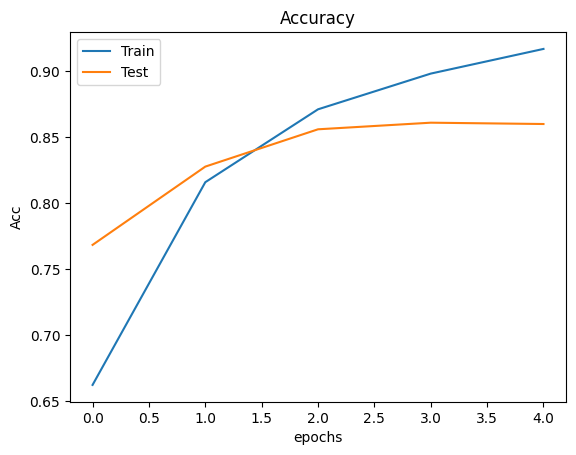

In [123]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

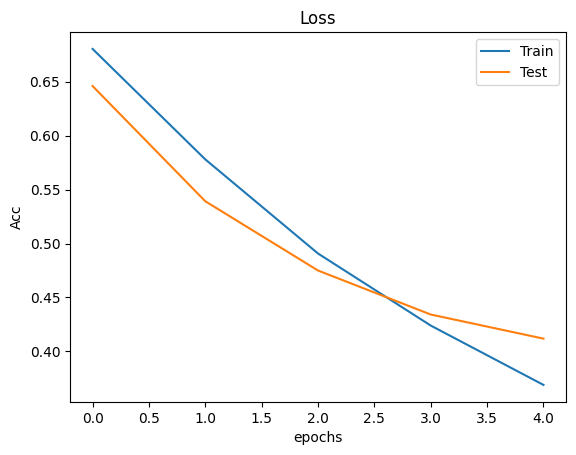

In [124]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [125]:
#BILSTM

In [126]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
# BiLSTM Model
inputs = Input(shape=(max_tokens,), dtype='int32')  # Giriş katmanı: sabit uzunlukta
x = Embedding(input_dim=15000, output_dim=128)(inputs)  # Embedding
x = Bidirectional(LSTM(64, return_sequences=True))(x)  # İlk BiLSTM katmanı
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(64))(x)  # İkinci BiLSTM katmanı
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)  # Çıkış katmanı (binary)

In [128]:
model_bilstm = Model(inputs, outputs)  # Modeli oluştur
model_bilstm.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [129]:
# Model Özeti
model_bilstm.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 292)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 292, 128)       │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 292, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 292, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,761 (8.08 MB)

 Trainable params: 2,117,761 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
S=5
SIZE=32
history_bilstm = model_bilstm.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    epochs=S,
    batch_size=SIZE,
    shuffle=True,
    verbose=1
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 224s 176ms/step - accuracy: 0.7975 - loss: 0.4184 - val_accuracy: 0.8840 - val_loss: 0.2988
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 218s 175ms/step - accuracy: 0.9306 - loss: 0.1913 - val_accuracy: 0.8816 - val_loss: 0.2874
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 219s 175ms/step - accuracy: 0.9563 - loss: 0.1242 - val_accuracy: 0.8870 - val_loss: 0.3427
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 234s 187ms/step - accuracy: 0.9722 - loss: 0.0823 - val_accuracy: 0.8742 - val_loss: 0.3785
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 240s 192ms/step - accuracy: 0.9822 - loss: 0.0556 - val_accuracy: 0.8730 - val_loss: 0.4452


In [131]:
y_pred_bilstm = model_bilstm.predict(x_test_pad).round()

print("\nAccuracy:", accuracy_score(y_test, y_pred_bilstm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bilstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bilstm))

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step

Accuracy: 0.873

Confusion Matrix:
 [[4503  458]
 [ 812 4227]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4961
           1       0.90      0.84      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [132]:
#CNN

In [133]:
import numpy
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D, Conv1D, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer  

In [134]:
max_tokens = 292

model_cnn= Sequential()
model_cnn.add(Embedding(15000, 32, input_length= max_tokens))

model_cnn.add(Conv1D(128, 5, padding= 'same', activation= 'relu'))
model_cnn.add(MaxPooling1D(5))

model_cnn.add(Conv1D(128, 5, padding= 'same', activation= 'relu'))
model_cnn.add(MaxPooling1D(5))

model_cnn.add(Conv1D(128, 5, padding= 'same', activation= 'relu'))
model_cnn.add(MaxPooling1D(5))

model_cnn.add(Flatten())
model_cnn.add(Dense(250, activation='relu'))
model_cnn.add(Dense(120, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [135]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.build(input_shape=(None, max_tokens))
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 292, 32)        │       480,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 292, 128)       │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 58, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 58, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 11, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 250)            │        64,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120)            │        30,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 759,195 (2.90 MB)

 Trainable params: 759,195 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model_cnn.fit(x_train_pad, y_train, validation_data= (x_test_pad, y_test), batch_size=128,
          epochs=2 ,verbose= 2)

Epoch 1/2
313/313 - 20s - 64ms/step - accuracy: 0.7554 - loss: 0.4505 - val_accuracy: 0.8736 - val_loss: 0.2935
Epoch 2/2
313/313 - 16s - 51ms/step - accuracy: 0.9167 - loss: 0.2169 - val_accuracy: 0.8857 - val_loss: 0.2823


In [137]:
y_pred= model_cnn.predict(x_test_pad).round()
z=accuracy_score(y_test,y_pred)
print(z)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
0.8857
[[4513  448]
 [ 695 4344]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4961
           1       0.91      0.86      0.88      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [138]:
#TAHMİN

In [139]:
# Örnek yorumlar
comments = [
    "I absolutely loved this movie! The story was great and the acting was phenomenal.",
    "This movie was terrible. The plot made no sense and the acting was awful.",
    "It was a decent film, but I expected more. The plot was okay, but the characters were lacking depth.",
    "I have never watched a movie like this before, and I hope I never do again.",
    "Not worth my time. Boring and predictable, I wouldn't recommend it to anyone."
]

# LSTM Modeli ile Tahmin Yapma
lstm_predictions = model_lstm.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens)).round()

# BiLSTM Modeli ile Tahmin Yapma
bilstm_predictions = model_bilstm.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens)).round()

# CNN Modeli ile Tahmin Yapma
cnn_predictions = model_cnn.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens)).round()

# Sonuçları Gösterme
print("\n--- Model Predictions ---")
for i in range(len(comments)):
    print(f"\nComment {i+1}: {comments[i]}")
    print(f"LSTM: {'Positive' if lstm_predictions[i] == 1 else 'Negative'}")
    print(f"BiLSTM: {'Positive' if bilstm_predictions[i] == 1 else 'Negative'}")
    print(f"CNN: {'Positive' if cnn_predictions[i] == 1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

--- Model Predictions ---

Comment 1: I absolutely loved this movie! The story was great and the acting was phenomenal.
LSTM: Positive
BiLSTM: Positive
CNN: Positive

Comment 2: This movie was terrible. The plot made no sense and the acting was awful.
LSTM: Negative
BiLSTM: Negative
CNN: Negative

Comment 3: It was a decent film, but I expected more. The plot was okay, but the characters were lacking depth.
LSTM: Negative
BiLSTM: Negative
CNN: Negative

Comment 4: I have never watched a movie like this before, and I hope I never do again.
LSTM: Negative
BiLSTM: Negative
CNN: Negative

Comment 5: Not worth my time. Boring and predictable, I wouldn't recommend it to anyone.
LSTM: Negative
BiLSTM: Negative
CNN: Negative


In [140]:
# Örnek yorumlar
comments = [
    "I absolutely loved this movie! The story was great and the acting was phenomenal.",
    "This movie was terrible. The plot made no sense and the acting was awful.",
    "It was a decent film, but I expected more. The plot was okay, but the characters were lacking depth.",
    "I have never watched a movie like this before, and I hope I never do again.",
    "Not worth my time. Boring and predictable, I wouldn't recommend it to anyone."
]

# LSTM Modeli ile Olasılıkları Gösterme
lstm_probabilities = model_lstm.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens))
print("\nLSTM Model Olasılıkları:")
for i, probability in enumerate(lstm_probabilities):
    sentiment = "Positive" if probability >= 0.5 else "Negative"
    print(f"Comment {i+1}: {comments[i]}")
    print(f"LSTM Probability: {probability[0]:.4f}, Sentiment: {sentiment}")

# BiLSTM Modeli ile Olasılıkları Gösterme
bilstm_probabilities = model_bilstm.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens))
print("\nBiLSTM Model Olasılıkları:")
for i, probability in enumerate(bilstm_probabilities):
    sentiment = "Positive" if probability >= 0.5 else "Negative"
    print(f"Comment {i+1}: {comments[i]}")
    print(f"BiLSTM Probability: {probability[0]:.4f}, Sentiment: {sentiment}")

# CNN Modeli ile Olasılıkları Gösterme
cnn_probabilities = model_cnn.predict(pad_sequences(tokenizer.texts_to_sequences(comments), maxlen=max_tokens))
print("\nCNN Model Olasılıkları:")
for i, probability in enumerate(cnn_probabilities):
    sentiment = "Positive" if probability >= 0.5 else "Negative"
    print(f"Comment {i+1}: {comments[i]}")
    print(f"CNN Probability: {probability[0]:.4f}, Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

LSTM Model Olasılıkları:
Comment 1: I absolutely loved this movie! The story was great and the acting was phenomenal.
LSTM Probability: 0.7442, Sentiment: Positive
Comment 2: This movie was terrible. The plot made no sense and the acting was awful.
LSTM Probability: 0.2420, Sentiment: Negative
Comment 3: It was a decent film, but I expected more. The plot was okay, but the characters were lacking depth.
LSTM Probability: 0.2594, Sentiment: Negative
Comment 4: I have never watched a movie like this before, and I hope I never do again.
LSTM Probability: 0.3599, Sentiment: Negative
Comment 5: Not worth my time. Boring and predictable, I wouldn't recommend it to anyone.
LSTM Probability: 0.2542, Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

BiLSTM Model Olasılıkları:
Comment 1: I absolutely loved this movie! The story was great and the acting was phenomenal.
BiLSTM Probability: 0.9970, Sentiment: Positive
Comment 2: This movie was terribl